In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('i7.csv', header = None, sep = ':')
data.head(10)

,0,1,2,3,4,5
0,cpu_openvino,1,53.82,18.58,vit_b_16,FP16
1,gpu_openvino,1,282.68,3.54,vit_b_16,FP16
2,cpu_openvino,1,37.76,26.48,vgg11,FP16
3,gpu_openvino,1,15.92,62.83,vgg11,FP16
4,cpu_openvino,1,18.11,55.20,resnet50,FP16
5,gpu_openvino,1,13.59,73.56,resnet50,FP16
6,cpu_openvino,2,152.57,13.11,vit_b_16,FP16
7,gpu_openvino,2,307.09,6.51,vit_b_16,FP16
8,cpu_openvino,2,69.22,28.89,vgg11,FP16
9,gpu_openvino,2,70.36,28.43,vgg11,FP16


In [4]:
data.to_csv("i7_cleaned.csv", index = False)

In [5]:
data[4].value_counts()

vit_b_16    36
vgg11       36
resnet50    36
Name: 4, dtype: int64

In [6]:
data[0].value_counts()

cpu_openvino    54
gpu_openvino    54
Name: 0, dtype: int64

In [21]:
vit_b_16_data = data[data[4] == 'vit_b_16']

In [22]:
precision_data = vit_b_16_data[vit_b_16_data[5] == 'FP16']
device_data = precision_data[precision_data[0] == 'gpu_openvino']

In [9]:
p = precision_data[precision_data[0] == 'cpu_openvino'][1]
p.head(10)

4       1
10      2
16      4
22      6
28      8
34     10
40     20
46     50
52    100
Name: 1, dtype: int64

In [10]:
device_data.head(10)

,0,1,2,3,4,5
5,gpu_openvino,1,13.59,73.56,resnet50,FP16
11,gpu_openvino,2,23.99,83.38,resnet50,FP16
17,gpu_openvino,4,42.08,95.06,resnet50,FP16
23,gpu_openvino,6,62.58,95.88,resnet50,FP16
29,gpu_openvino,8,80.64,99.21,resnet50,FP16
35,gpu_openvino,10,112.08,89.22,resnet50,FP16
41,gpu_openvino,20,199.58,100.21,resnet50,FP16
47,gpu_openvino,50,490.92,101.85,resnet50,FP16
53,gpu_openvino,100,980.67,101.97,resnet50,FP16


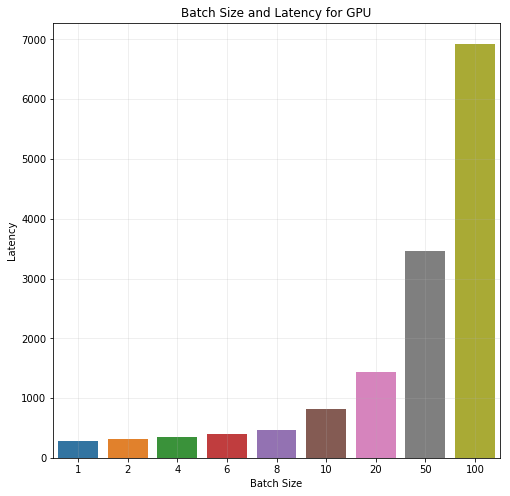

In [23]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][2])
plt.title("Batch Size and Latency for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_gpu.svg")
plt.show()

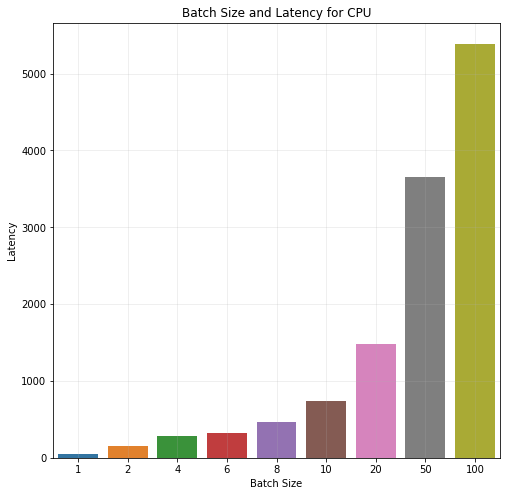

In [24]:
plt.figure(figsize = (8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][2])
plt.title("Batch Size and Latency for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Latency")
plt.savefig("batch_size_latency_cpu.svg")
plt.show()

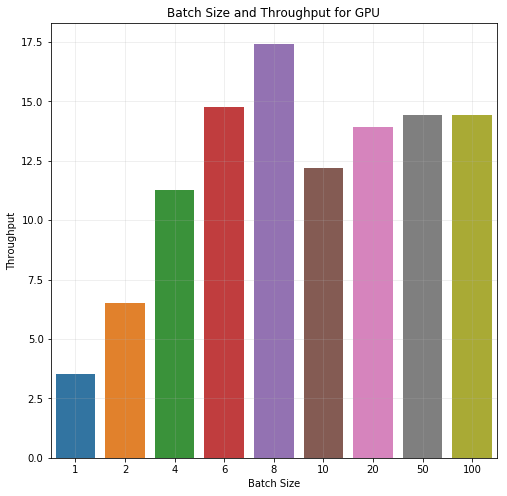

In [25]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'gpu_openvino'][1], y = precision_data[precision_data[0] == 'gpu_openvino'][3])
plt.title("Batch Size and Throughput for GPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_gpu.svg")
plt.show()

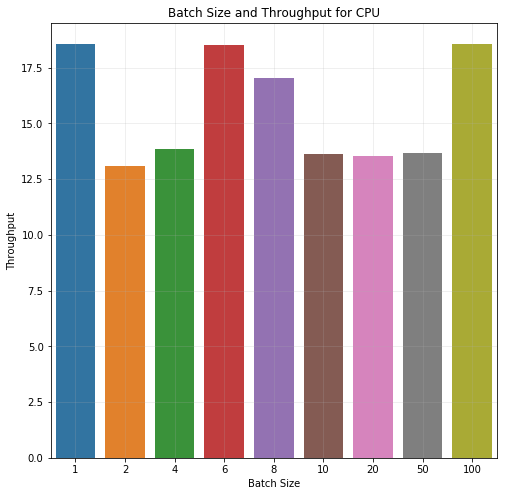

In [26]:
plt.figure(figsize=(8,8))
sns.barplot(x = precision_data[precision_data[0] == 'cpu_openvino'][1], y = precision_data[precision_data[0] == 'cpu_openvino'][3])
plt.title("Batch Size and Throughput for CPU")
plt.grid(alpha = 0.25)
plt.xlabel("Batch Size")
plt.ylabel("Throughput")
plt.savefig("batch_size_throughput_cpu.svg")
plt.show()